In [25]:
!pip install -r "/Users/aastik/Documents/ML/ML-Projects/requirements.txt"

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
## shape of the dataset
df.shape

(1000, 8)

In [29]:
## checking missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [30]:
## checking duplicate values
df.duplicated().sum()

0

In [31]:
## check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [32]:
## unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [33]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [34]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [35]:
print("categories in 'gender' variable:")
print(df['gender'].unique())
print()
print("categories in 'race/ethnicity' variable:")
print(df['race/ethnicity'].unique())
print()
print("categories in 'gender' variable:")
print(df['parental level of education'].unique())
print()
print("categories in 'lunch' variable:")
print(df['lunch'].unique())
print()
print("categories in 'test preparation course' variable:")
print(df['test preparation course'].unique())
print()




categories in 'gender' variable:
['female' 'male']

categories in 'race/ethnicity' variable:
['group B' 'group C' 'group A' 'group D' 'group E']

categories in 'gender' variable:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

categories in 'lunch' variable:
['standard' 'free/reduced']

categories in 'test preparation course' variable:
['none' 'completed']



In [36]:
## defining all the numeric and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_featres = [feature for feature in df.columns if df[feature].dtype == 'O']

print("numeric features:", numeric_features)
print()
print("categorical features:", categorical_featres)

numeric features: ['math score', 'reading score', 'writing score']

categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [38]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Adding columns for "Total Score" and "Average Score"

In [39]:
df['Total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average_score'] = df['Total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [40]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [41]:
reading_full = df[df['reading score'] == 100]['Average_score'].count()
print(f"number of students with full reading score: {reading_full}" )

math_full = df[df['math score'] == 100]['Average_score'].count()
print(f"number of students with full math score: {math_full}" )

writing_full =df[df['writing score'] == 100]['Average_score'].count()
print(f"number of students with full writing score: {writing_full}")

number of students with full reading score: 17
number of students with full math score: 7
number of students with full writing score: 14


In [42]:
reading_less_20 = df[df['reading score'] <= 20]['Average_score'].count()
print(f"number of the student with less marks than 20 in reading: {reading_less_20}")

writing_less_20 = df[df['writing score'] <= 20]['Average_score'].count()
print(f"number of the student with less marks than 20 in writing: {writing_less_20}")

math_less_20 = df[df['math score'] <= 20]['Average_score'].count()
print(f"number of the student with less marks than 20 in maths: {math_less_20}")

number of the student with less marks than 20 in reading: 1
number of the student with less marks than 20 in writing: 3
number of the student with less marks than 20 in maths: 4


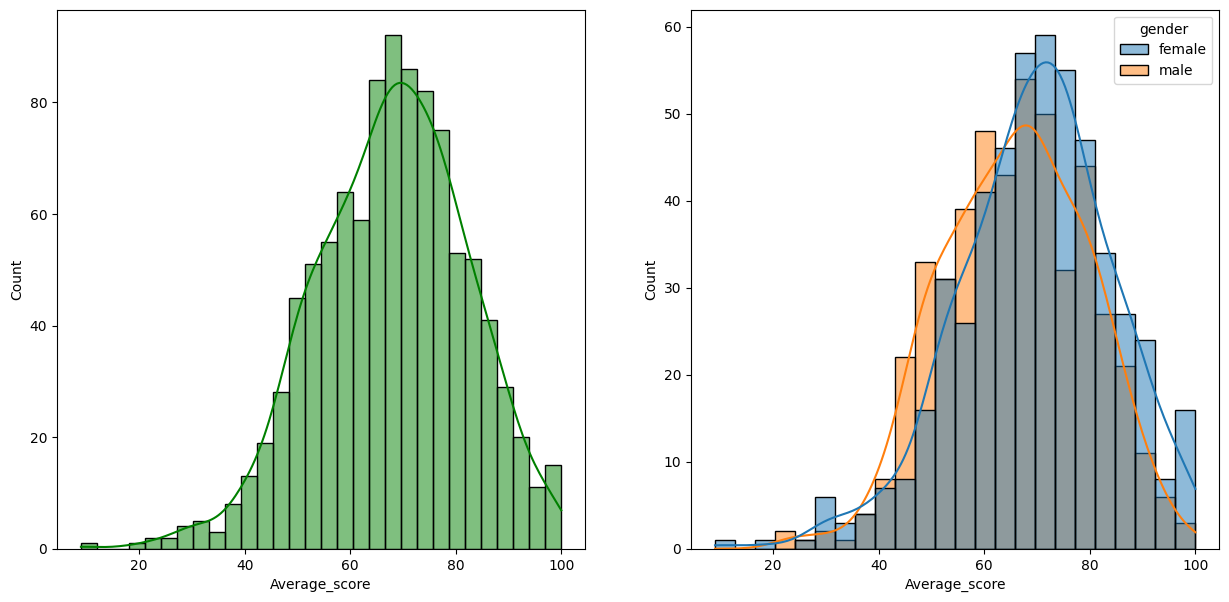

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average_score', kde=True, hue='gender', )
plt.show()

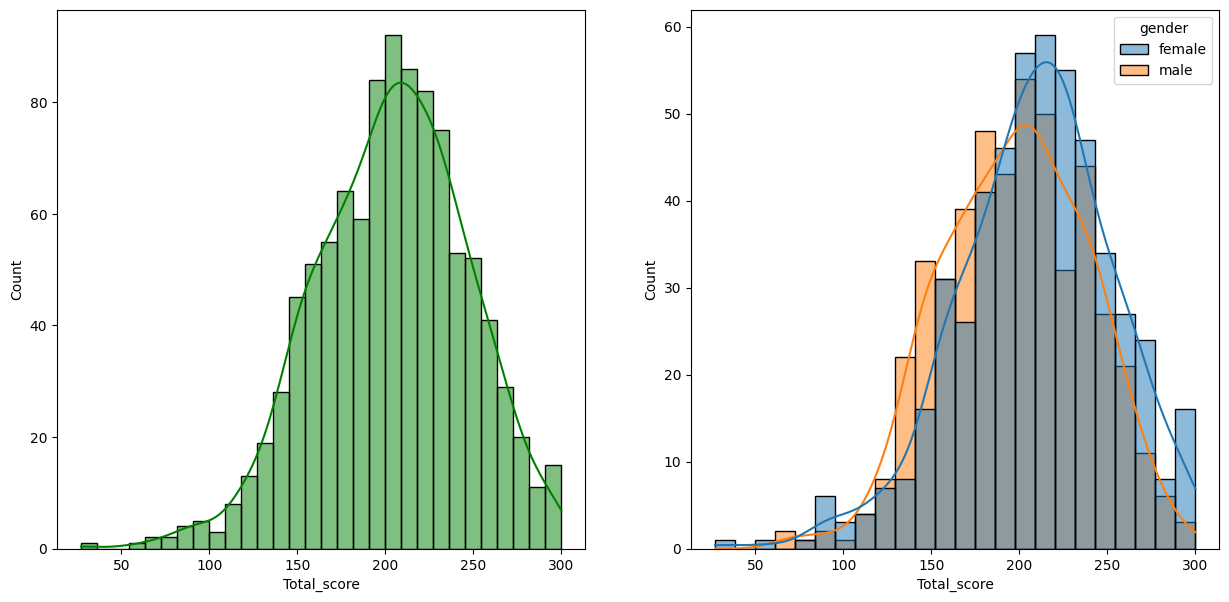

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total_score', kde=True, hue='gender', )
plt.show()

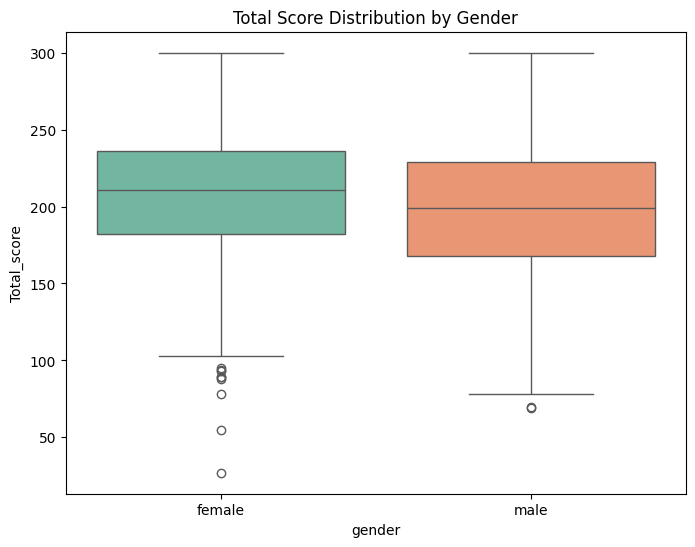

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='Total_score', palette="Set2")
plt.title("Total Score Distribution by Gender")
plt.show()

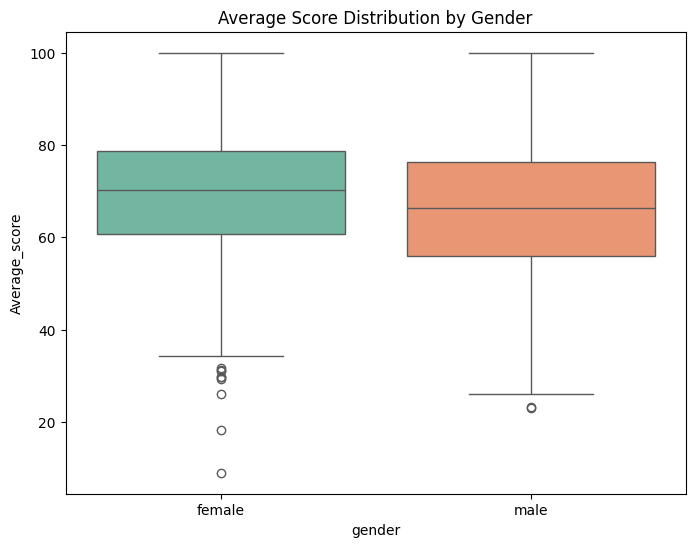

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='Average_score', palette="Set2")
plt.title("Average Score Distribution by Gender")
plt.show()

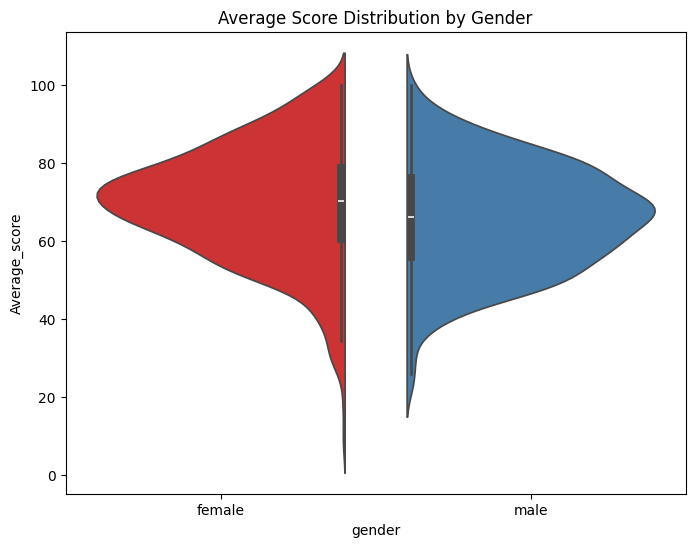

In [47]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='gender', y='Average_score', palette="Set1", split=True)
plt.title("Average Score Distribution by Gender")
plt.show()

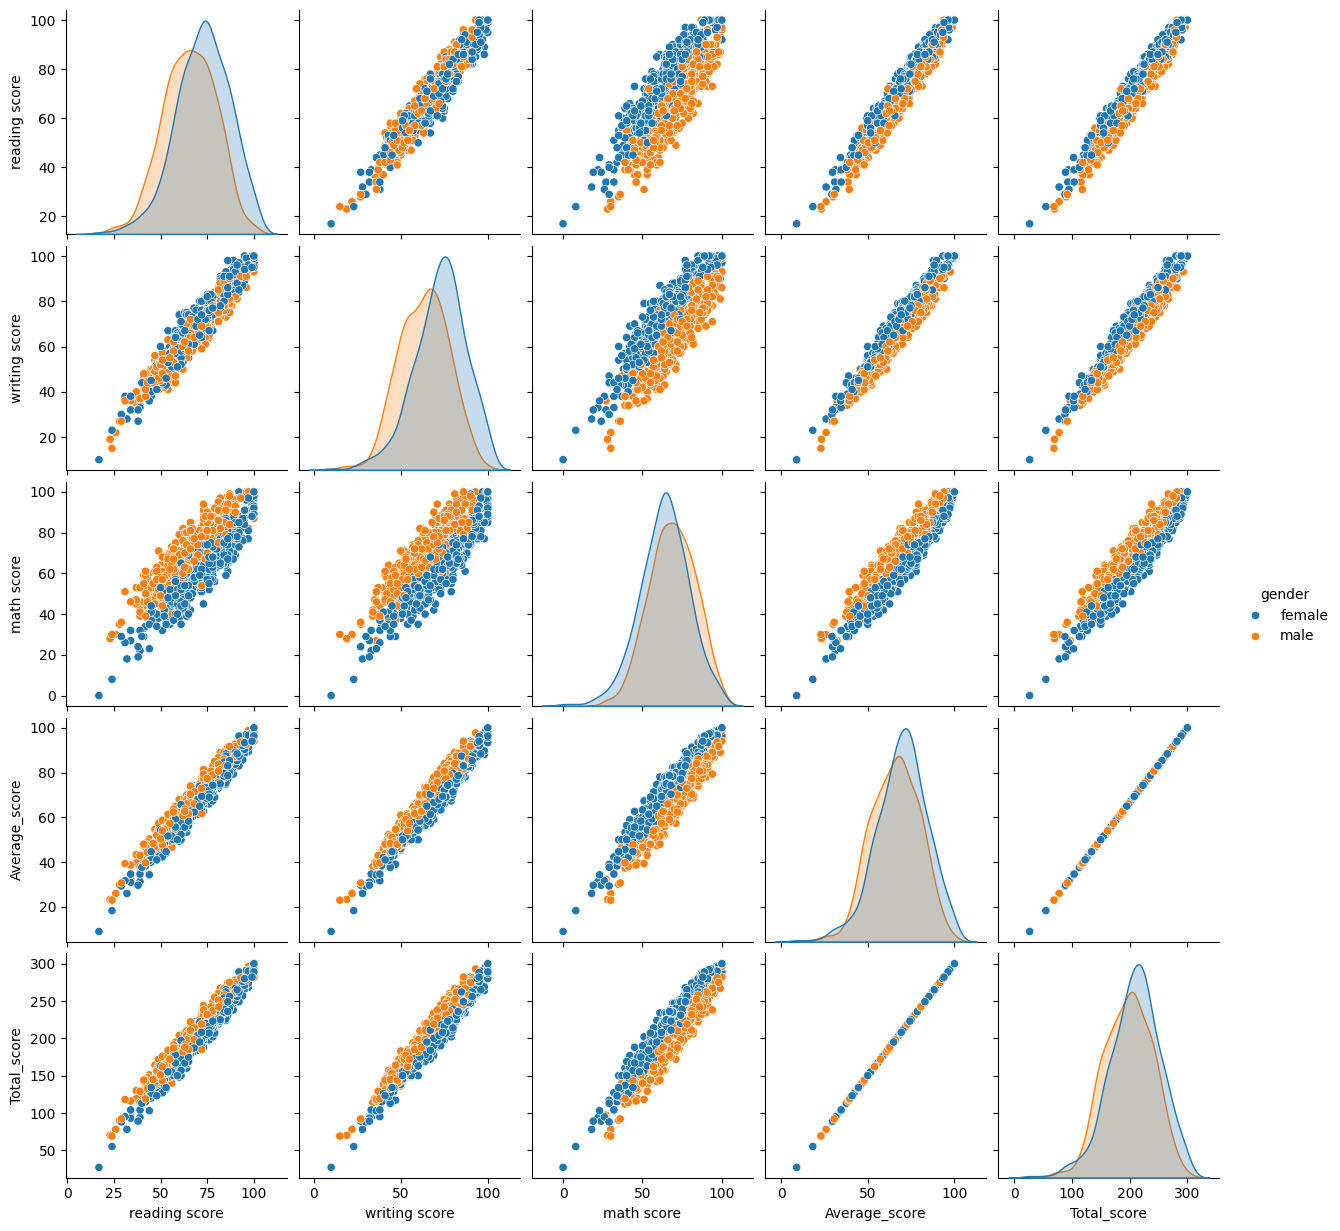

In [48]:
sns.pairplot(df, vars=['reading score', 'writing score', 'math score', 'Average_score', 'Total_score'], hue='gender', diag_kind="kde")
plt.show()